import libraries and dataset

In [65]:
import pandas as pd
import numpy as np

In [66]:
file_path = r"C:\Users\Tanishq\Documents\stuttgart\Study\winter 25\DS and AI for industry work1\project\data_science_project\ted_main_v2.csv\ted_main_v2.csv"

In [67]:
import os
print(os.path.exists(file_path))

True


In [68]:
df = pd.read_csv(file_path)

In [69]:
df.head(5)

,speaker_name,title,posted_date,duration,Link,about_speaker,about_talk,views,tags
0,Alex Gendler,The Egyptian myth of the death of Osiris,Jul 2020,3:56,https://www.ted.com/talks/alex_gendler_the_egy...,NaN,"Long jealous of his older brother Osiris, the ...","208,703","education,ancient world,TED-Ed"
1,Shari Davis,What if you could help decide how the governme...,Jul 2020,10:28,https://www.ted.com/talks/shari_davis_what_if_...,As a leader of the Participatory Budgeting Pro...,What if you could help decide how the governme...,"425,688","democracy,leadership,community"
2,Nita Mosby Tyler,Want a more just world? Be an unlikely ally,Jul 2020,10:15,https://www.ted.com/talks/nita_mosby_tyler_wan...,Nita Mosby Tyler specializes in the developmen...,A more equal world starts with you. Citing a f...,"460,269","activism,inequality,race"
3,Susan Lupack,The race to decode a mysterious language,Jul 2020,4:24,https://www.ted.com/talks/susan_lupack_the_rac...,NaN,"In the early 1900s, archaeologist Sir Arthur E...","350,202","TED-Ed,education,language"
4,Ariel Waldman,The colorful critter world of microbes in Anta...,Jul 2020,5:56,https://www.ted.com/talks/ariel_waldman_the_co...,"An artist who's pivoted to science, Ariel Wald...","In this tour of the microscopic world, explore...","333,482","science,animals,exploration"


In [70]:
print("Raw Data Preview:")
print(df[['views', 'duration']].head(10))


Raw Data Preview:
     views duration
0  208,703     3:56
1  425,688    10:28
2  460,269    10:15
3  350,202     4:24
4  333,482     5:56
5   50,273    14:51
6  169,272     5:10
7  575,657    10:58
8      NaN    26:32
9  262,067     4:54


In [71]:
# Clean 'views' column
df['views'] = df['views'].replace(['', 'N/A', 'None'], np.nan)  # Replace invalid entries with NaN
df['views'] = df['views'].astype(str).str.replace(r',', '', regex=True)  # Remove commas
df['views'] = pd.to_numeric(df['views'], errors='coerce')  # Convert to numeric

# Clean 'duration' column
def convert_duration_to_seconds(duration):
    try:
        minutes, seconds = map(int, duration.split(':'))
        return minutes * 60 + seconds
    except:
        return np.nan  # Handle invalid formats

df['duration'] = df['duration'].apply(convert_duration_to_seconds)  # Convert duration to seconds

# Verify cleaned data
print("Cleaned Data Preview:")
print(df[['views', 'duration']].info())
print(df[['views', 'duration']].describe())

# Step 1: Number of unique videos
num_unique_videos = df['title'].nunique()

# Step 2: Number of unique speakers
num_unique_speakers = df['speaker_name'].nunique()

# Step 3: Top 5 viewed videos
top_5_videos = df[['title', 'views']].sort_values(by='views', ascending=False).head(5)

# Display results
result = {
    "Number of Unique Videos": num_unique_videos,
    "Number of Unique Speakers": num_unique_speakers,
    "Top 5 Viewed Videos": top_5_videos
}
print(result)

Cleaned Data Preview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   views     2155 non-null   float64
 1   duration  2155 non-null   float64
dtypes: float64(2)
memory usage: 33.9 KB
None
              views     duration
count  2.155000e+03  2155.000000
mean   2.060034e+06   659.196752
std    2.944472e+06   340.526498
min    1.023100e+04    60.000000
25%    9.884700e+05   343.500000
50%    1.496189e+06   682.000000
75%    2.128472e+06   863.500000
max    6.023746e+07  3503.000000
{'Number of Unique Videos': 2160, 'Number of Unique Speakers': 1915, 'Top 5 Viewed Videos':                                                   title       views
1855  This is what happens when you reply to spam email  60237459.0
1800         Inside the mind of a master procrastinator  40135933.0
2056                 The next outbreak? We're not ready  36342453.0
1136     

In [72]:
# Remove rows where 'views' is NaN
df = df.dropna(subset=['views'])

# Verify the updated data
print("Updated Data Info:")
print(df[['views', 'duration']].info())

# Step 1: Number of unique videos
num_unique_videos = df['title'].nunique()

# Step 2: Number of unique speakers
num_unique_speakers = df['speaker_name'].nunique()

# Step 3: Top 5 viewed videos
top_5_videos = df[['title', 'views']].sort_values(by='views', ascending=False).head(5)

# Display results
result = {
    "Number of Unique Videos": num_unique_videos,
    "Number of Unique Speakers": num_unique_speakers,
    "Top 5 Viewed Videos": top_5_videos
}
print(result)


Updated Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2155 entries, 0 to 2159
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   views     2155 non-null   float64
 1   duration  2150 non-null   float64
dtypes: float64(2)
memory usage: 50.5 KB
None
{'Number of Unique Videos': 2155, 'Number of Unique Speakers': 1912, 'Top 5 Viewed Videos':                                                   title       views
1855  This is what happens when you reply to spam email  60237459.0
1800         Inside the mind of a master procrastinator  40135933.0
2056                 The next outbreak? We're not ready  36342453.0
1136                     My philosophy for a happy life  35114993.0
1860  What makes a good life? Lessons from the longe...  34095862.0}


In [73]:
# Extract top viewed videos 
top_5_videos_with_categories = df[['title', 'views']].sort_values(by='views', ascending=False).head(5)

# Display the resulting dataframe
top_5_videos_with_categories


,title,views
1855,This is what happens when you reply to spam email,60237459.0
1800,Inside the mind of a master procrastinator,40135933.0
2056,The next outbreak? We're not ready,36342453.0
1136,My philosophy for a happy life,35114993.0
1860,What makes a good life? Lessons from the longe...,34095862.0


In [74]:
# Extract least 5 viewed videos 
least_5_videos_with_categories = df[['title', 'views']].sort_values(by='views', ascending=True).head(5)

# Display the resulting dataframe
least_5_videos_with_categories


,title,views
798,Cómo usar el arte de la fotografía para restau...,10231.0
1111,"""Illusions for a better society""",10687.0
1122,"Undocumented lives, inside out",10793.0
358,Humanity at the intersection of science and ar...,11028.0
1054,Por qué necesitamos proteger el alta mar,11411.0


In [75]:
# Identify the most watched video
most_watched_video = df.loc[df['views'].idxmax(), ['title', 'views', 'tags']]

# Identify the least watched video
least_watched_video = df.loc[df['views'].idxmin(), ['title', 'views', 'tags']]

comparison_df = pd.DataFrame({
    "Metric": ["Title", "Views", "Tags"],
    "Most Watched Video": [most_watched_video['title'], most_watched_video['views'], most_watched_video['tags']],
    "Least Watched Video": [least_watched_video['title'], least_watched_video['views'], least_watched_video['tags']]
})
print(comparison_df)


  Metric                                 Most Watched Video  \
0  Title  This is what happens when you reply to spam email   
1  Views                                         60237459.0   
2   Tags                            aging,data,mission blue   

                                 Least Watched Video  
0  Cómo usar el arte de la fotografía para restau...  
1                                            10231.0  
2                   photography,community,creativity  


Modeling

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns



# Data Cleaning: Ensure 'views' and 'duration' are numeric and clean missing values
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df = df.dropna(subset=['views', 'duration'])

# Normalize 'duration' for better model convergence
df['duration_scaled'] = (df['duration'] - df['duration'].mean()) / df['duration'].std()

# Fit the LMM
model = smf.mixedlm("views ~ duration_scaled", df, groups=df["speaker_name"])
result = model.fit()

# Print the summary 
print(result.summary())

# Visualization
if result.pvalues["duration_scaled"] < 0.05:
    plt.figure(figsize=(10, 6))
    sns.regplot(x="duration", y="views", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title("Influence of Duration on Views (Statistically Significant)")
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Views")
    plt.show()
else:
    print("Duration is not statistically significant. No visualization created.")


Inspect Averages due to Severe Outliers

In [57]:
# Calculate the average views 
average_views = df['views'].mean()
print(f"The average number of views are: {average_views}")

# Calculate average duration:
average_duration = df["duration"].mean()
print(f"The average duration is: {average_duration}")

The average number of views are: 2060890.8176744187
The average duration is: 658.5023255813953


Normalize duration and views

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: views_scaled
No. Observations: 2150    Method:             REML        
No. Groups:       1909    Scale:              0.7323      
Min. group size:  1       Log-Likelihood:     -3022.2507  
Max. group size:  31      Converged:          Yes         
Mean group size:  1.1                                     
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       -0.012    0.022 -0.547 0.584 -0.056  0.031
duration_scaled  0.064    0.022  2.891 0.004  0.021  0.108
Group Var        0.251    0.054                           



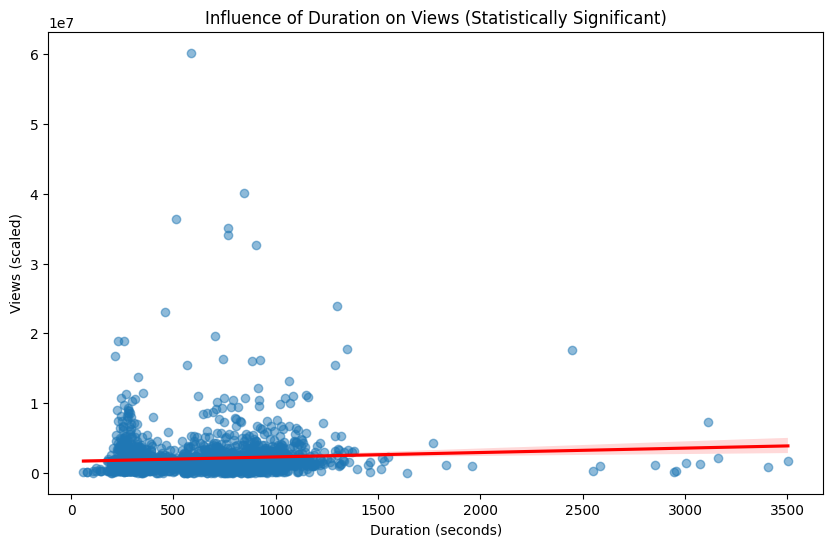

In [58]:



# Normalize 'duration' and 'views' for better model convergence
df['duration_scaled'] = (df['duration'] - df['duration'].mean()) / df['duration'].std()
df['views_scaled'] = (df['views'] - df['views'].mean()) / df['views'].std()

# Fit the LMM with scaled views
model = smf.mixedlm("views_scaled ~ duration_scaled", df, groups=df["speaker_name"])
result = model.fit()

# Print the summary 
print(result.summary())

# Visualization: 
if result.pvalues["duration_scaled"] < 0.05:
    plt.figure(figsize=(10, 6))
    sns.regplot(x="duration", y="views", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title("Influence of Duration on Views (Statistically Significant)")
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Views (scaled)")
    plt.show()
else:
    print("Duration is not statistically significant. No visualization created.")


Remove Top and Bottom 500 videos

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: views_scaled
No. Observations: 1150    Method:             REML        
No. Groups:       1099    Scale:              0.8760      
Min. group size:  1       Log-Likelihood:     -1633.6587  
Max. group size:  12      Converged:          Yes         
Mean group size:  1.0                                     
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       -0.002    0.030 -0.073 0.942 -0.061  0.056
duration_scaled  0.063    0.030  2.106 0.035  0.004  0.121
Group Var        0.121    0.143                           



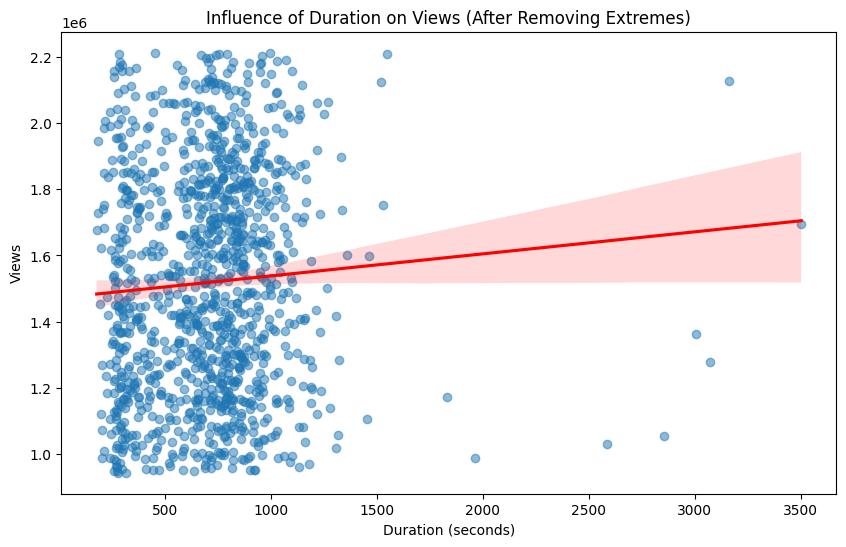

In [64]:

df_sorted = df.sort_values(by='views', ascending=True).iloc[500:-500]

# Normalize 'duration' and 'views' for better model convergence
df_sorted['duration_scaled'] = (df_sorted['duration'] - df_sorted['duration'].mean()) / df_sorted['duration'].std()
df_sorted['views_scaled'] = (df_sorted['views'] - df_sorted['views'].mean()) / df_sorted['views'].std()

# Fit the LMM
model = smf.mixedlm("views_scaled ~ duration_scaled", df_sorted, groups=df_sorted["speaker_name"])
result = model.fit()

# Print the summary of the model
print(result.summary())

# Visualization: 
if result.pvalues["duration_scaled"] < 0.05:
    plt.figure(figsize=(10, 6))
    sns.regplot(x="duration", y="views", data=df_sorted, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title("Influence of Duration on Views (After Removing Extremes)")
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Views")
    plt.show()
else:
    print("Duration is not statistically significant. No visualization created.")
